Let's start with the Lennard-Jones potential energy model. 
But before doing that, let's recap on the Newton's second law of motion.

$\vec{f}=m\vec{a}$
  
$\vec{f}$ is the force vector on an atom of mass, m, with an acceleration vector $\vec{a}$. Between two atoms, at a position $r$, can be found from the interaction energy, $E(r)$ -- the energy term described by the Lennard-Jones potential.

$\vec{f}=\frac{-\partial E(r)}{\partial r}$
Be aware, the force $\vec{f}$ exist on every degrees of freedom. 


We have introduced the classical potential models, and have derived and shown some of their basic properties. Now we can use these potential models to look into the dynamics of the system.


## Task1: Print the L-J force for Ar–Ar interactions.
## Input: r (distance), epsilon (potential energy at the equilibrium bond distance), and sigma (distance at which the potential energy is zero)
## Output: the force between the Ar–Ar atoms.
## Hint: 1. the energy function is: 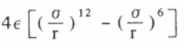
## Hint: 2. you have to take the derivative of energy to r to get force.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann
mass_of_argon = 39.948 # amu

def lj_force(r, epsilon, sigma):
    #negative derivative of energy as a function of r
    #sigma and r in angstroms, epsilon is in kJ/mol
    return ##FILL IN HERE
    
r = np.linspace(3.5, 8, 100)
plt.plot(r, lj_force(r, 0.0103, 3.4))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$f$/eVÅ$^{-1}$')
plt.show()

## Task2: MD propagation

first we can go thru verlet define time step $\Delta t$
first we start from position coordinating $r$ Taylor expansion at $\Delta t$:

$r(t+\Delta t) \approx r(t) + \Delta tdot{r(t)} + \frac{1}{2} \Delta t^2 \ddot{r} = r(t)+ \Delta tv(t) + \frac{1}{2} \Delta t^2 a(t)$     …………  eq1

on the opposite direction: 

$r(t-\Delta t) \approx r(t)- \Delta tv(t) + \frac{1}{2} \Delta t^2 a(t)$  …………eq2

eq1 + eq2 we can have:

$r(t-\Delta t) + r(t+\Delta t) \approx 2 r(t) +  \Delta t^2 a(t)$

for position $r$

$ r(t+\Delta t) \approx 2 r(t) - r(t-\Delta t) +  \Delta t^2 a(t)$

the Velocity for t can be determined as:

Velocity: $v(t) = \frac{r(t-\Delta t) - r(t+\Delta t)}{2\Delta t}$

However, it is unstable to directly use $r(t-\Delta t) - r(t+\Delta t)$

So Velocity Verlet method:

first from eq1 and eq2 we can have 

$r(t) = r(t+\Delta t)  - \Delta tv(t + \Delta t) + \frac{1}{2}\Delta t^2 a(t + \Delta t) $ ………… eq3

and we can have:

$ r(t+\Delta t) = r(t) + \Delta tv(t) + \frac{1}{2}\Delta t^2 a(t)$ ………… eq4

then we put eq4 to eq3

$v(t + \Delta t) = v(t) + \frac{1}{2}\Delta t[ 2a(t) + a(\Delta t)]$ ………… eq5 #VV algorithm



Pseudocode for total VV

$a(0) \leftarrow Update \ force:\frac{\vec{F[r(0)]}}/{m}$

$for k=0 … nsteps $ 

$for i=1 …… n$ n=total atoms number:

${v_i}(t + \frac{\Delta t}{2}) \leftarrow {v_i}(t) + \frac{1}{2} \Delta t {a_i}(t) $


$for i=1 …… n$ n=total atoms number:

${r_i}(t + {\Delta t}) \leftarrow {r_i}(t) + \Delta t {v_i}(t + \frac{\Delta t}{2})$


${a_i}(t + \Delta t) \leftarrow \ Update \ next \ step \ force: \frac{\vec{F[r(t + {\Delta t})]}}/{m}$


$for i=1 …… n $ n=total atoms number:

${v_i}(t + {\Delta t}) \leftarrow {v_i}(t + \frac{\Delta t}{2}) + \frac{1}{2} \Delta t {a_i}(t + \Delta t) $


In [ ]:

def get_accelerations(positions):
    """
    Calculate the acceleration on each 
    particle as a  result of each other 
    particle. 

    """
    forces = []
    # calculate displacements
    for i in np.arange(0,len(positions)):
        force = 0.0
        for j in np.arange(0,len(positions)):
            if i != j:
                force += \
                    lj_force(positions[j]-positions[i], 0.0103, 3.4);
                    #lj_force(positions[j][1]-positions[i][1], 0.0103, 3.4),
                    #lj_force(positions[j][2]-positions[i][2], 0.0103, 3.4)
                #print(force)
        forces.append(force)
    assert len(forces) == len(positions)
    return np.array(forces)/(mass_of_argon)# list of accelerations at the same length of i

accel = get_accelerations(np.array([1, 5, 10]))
print('Acceleration on particle 0 = {:.3e} eV/Åamu'.format(
    accel[0]))
print('Acceleration on particle 1 = {:.3e} eV/Åamu'.format(
    accel[1]))
print('Acceleration on particle 2 = {:.3e} eV/Åamu'.format(
    accel[2]))

In [ ]:
def update_pos(x, v, a, dt):
    """
    Update the particle positions.

    x: ndarray of floats
        The positions of the particles in a 
        single dimension 
    v: ndarray of floats
        The velocities of the particles in a 
        single dimension 
    a: ndarray of floats
        The accelerations of the particles in a 
        single dimension 
    dt: float
        The timestep length 
    
    """
    # Use velocity verlet to get new positions
    vihalft = ##FILL in from V(t+dt/2) in pseudocode for VV algorithm 
    ridt = #FILL in from r(t+dt) in pseudocode for VV algorithm
    return ridt

def update_velo(v, a, a1, dt):
    """
    Update the particle velocities.

    v: ndarray of floats
        The velocities of the particles in a 
        single dimension (eVs/Åamu)
    a: ndarray of floats
        The accelerations of the particles in a 
        single dimension at the previous 
        timestep (eV/Åamu)
    a1: ndarray of floats
        The accelerations of the particles in a 
        single dimension at the current 
        timestep (eV/Åamu)
    dt: float
        The timestep length (s)
    
    """
    # Use velocity verlet to get new velocities
    vdt = #FILL out from eq5 above
    
    return vdt

In [ ]:
def init_velocity(T, number_of_particles):
    """
    Initialise the velocities for a series 
    of particles.

    T: float
        Temperature of the system at 
        initialisation (K)
    number_of_particles: int
        Number of particles in the 
        system
    
    
    """
    R = np.random.rand(number_of_particles) - 0.5 #for Question 1
    return R * np.sqrt(Boltzmann * T / (mass_of_argon * 1.602e-19))




In [ ]:
#Question 1: Why do we subtract 0.5 from the np.random.rand function call.
##hint:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.rand(1000)
plt.hist(x)
plt.show()

Lets start to get your hand dirty direct python coding for a MD simulation 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann
mass_of_argon = 39.948 # argon 


## Task3: If you have dealt with the above-mentioned functions properly, you will be able to run MD by your own code!


In [ ]:
def run_md(dt, number_of_steps, initial_temp, x):

    positions = np.zeros((number_of_steps, 3))
    v = init_velocity(initial_temp, 3)
    a = get_accelerations(x)
    for i in range(number_of_steps):
        x = update_pos(x, v, a, dt)
        a1 = get_accelerations(x)
        v = update_velo(v, a, a1, dt)
        a = np.array(a1)
        positions[i, :] = x
    return positions

In [ ]:
x = np.array([1, 5, 10])
sim_pos = run_md(0.1, 10000, 300, x)
    
for i in range(sim_pos.shape[1]):
    plt.plot(sim_pos[:, i], '.', label='atom {}'.format(i))
plt.xlabel(r'Step')
plt.ylabel(r'$x$-Position/Å')
plt.legend(frameon=False)
plt.show()

# Tasks:
1. (Easy): Modify vode above so it can work with any arbitrary epsilon and sigma parameters. 
    For Argon, we used `sigma=3.4 angstroms`, `epsilon=0.0103 kJ/mol`
2. (Medium): Modify the code to output the velocities of the particles. 
    Plot the total momentum of the system (mass times velocity) over time to see if our simulation conserves momentum.
3. (Hard): Modify the above code to handle 3 dimensional positions for our input state. Can you plot the total distance between molecules as a function of time?
4. (Hard): Energy is a function of positional energy `(potential energy from the lj energy calculation)` and the kinetic energy `(0.5*mass*velocity**2)`. Write out the energy as a function of time and plot over the course of the simulation. See the equation provided in task 1 for the lj energy function.